In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LassoCV
import statsmodels.api as sm

In [ ]:
# Mount to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd '/content/gdrive/My Drive/AMS380/HW/Housing_Analysis'

/content/gdrive/My Drive/AMS380/HW/HW2


## 1. Import Data and Initial Exploratory Data Analysis
Performing initial exploratory data analysis (EDA) involves understanding the dataset's structure, summarizing its main characteristics, and visualizing relationships between variables.

In [ ]:
# Load the dataset
data = pd.read_csv('housing.csv')

In [ ]:
# Display the data
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [ ]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB
None


In [ ]:
# Display summary statistics
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

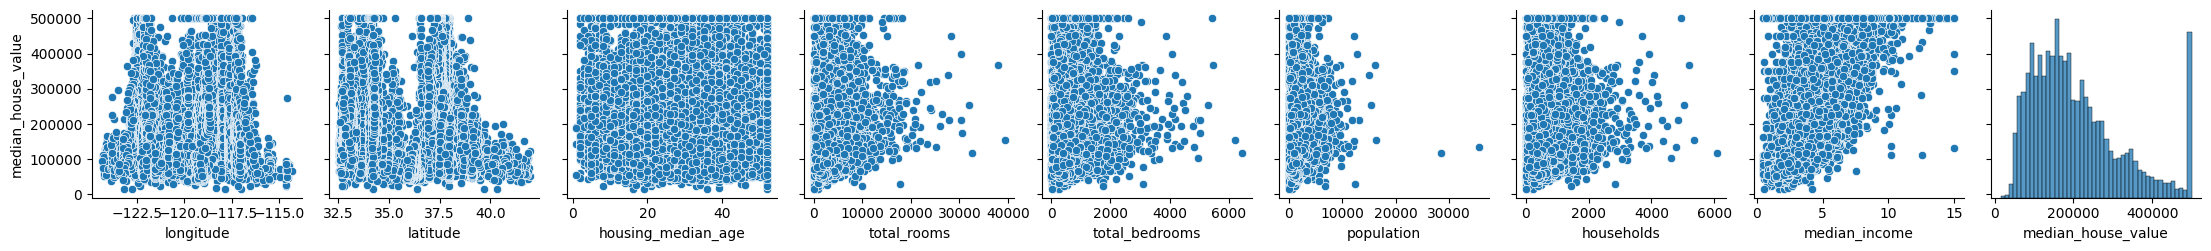

In [ ]:
# Visualize the relationship between different variables and the median house value -> # Pairplot
sns.pairplot(data=data, x_vars=data.columns[:-1], y_vars='median_house_value')
plt.show()

## 2. Handle any missing values, if present
 Addressing and managing any instances within a dataset where data is missing or unavailable for certain observations or features.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [ ]:
# Since there are missing values in 'total_bedrooms', let's fill them with the median value
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)

In [ ]:
missing_values = data.isnull().sum()
print('Missing values per column:')
print(missing_values)

Missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


## 3. Convert categorical variables (like ocean proximity) to numerical format using appropriate encoding techniques.
Create new binary columns for each category in the categorical variables, then indicate whether if each data belongs to each category (1 means yes and 0 means no)

In [ ]:
data = pd.get_dummies(data, columns=['ocean_proximity'])

In [ ]:
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

In [ ]:
print(data.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  \
0         322         126         8.3252              452600   
1        2401        1138         8.3014              358500   
2         496         177         7.2574              352100   
3         558         219         5.6431              341300   
4         565         259         3.8462              342200   

   ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                          0                       0                       0   
1   

##  4. Split the dataset into a training set and a testing set

In [ ]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 5. Build a multiple linear regression model using all the features to predict the median house value.

In [ ]:
# Fit the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
train_data = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()

# Get a summary of the model
summary = model.summary()

# Print the summary
print(summary)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     2550.
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:23:35   Log-Likelihood:            -2.0727e+05
No. Observations:               16512   AIC:                         4.146e+05
Df Residuals:                   16499   BIC:                         4.147e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
longitude           

## 6. Estimate the coefficients of the model

$Y$ = $\beta_0$ + $\beta_1 X_1$ + $\beta_2 X_2$ + … + $\beta_p X_p$ + ϵ

In [ ]:
# Coefficients
coefficients = regressor.coef_ # beta_n where n>=1
intercept = regressor.intercept_ # beta_0

print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [-2.68382734e+04 -2.54683520e+04  1.10218508e+03 -6.02150567e+00
  1.02789395e+02 -3.81729064e+01  4.82527528e+01  3.94739752e+04
 -1.89265829e+04 -5.87132390e+04  1.17198490e+05 -2.40632251e+04
 -1.54954428e+04]
Intercept: -2256620.7988544535


## 7. Evaluate the model using metrics like R-squared, RMSE, etc. on the testing set.

In [ ]:
# Predict using the test set
y_pred = regressor.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Calculate the RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R-squared:', r2)
print('Root Mean Squared Error:', rmse)

R-squared: 0.6254240620553595
Root Mean Squared Error: 70060.52184473528


## 8. Conduct variable selection using a method of your choice (e.g., backward elimination, forward selection, or LASSO) to determine which variables significantly predict the median house value.

In [ ]:
# LASSO
lasso = LassoCV()
lasso.fit(X_train, y_train)
dir(lasso)

# Display the selected features
selected_features = X.columns[lasso.coef_ != 0]
print('Selected features:', np.array(selected_features))

Selected features: ['housing_median_age' 'total_rooms' 'total_bedrooms' 'population'
 'households' 'median_income']


In [ ]:
# Forward Selection
import statsmodels.api as sm

# Initialize an empty set of selected features
selected_features = set()

while True:
    candidates = set(X.columns) - selected_features
    p_values = []

    for feature in candidates:
        model = sm.OLS(y, sm.add_constant(X[list(selected_features)+[feature]])).fit()
        p_value = model.pvalues[feature]
        p_values.append((p_value, feature))

    best_candidate_p, best_candidate = min(p_values)
    if best_candidate_p < 0.05:  # Adjust the significance level as needed
        selected_features.add(best_candidate)
    else:
        break

print("Selected Features:", list(selected_features))



Selected Features: ['total_bedrooms', 'latitude', 'housing_median_age', 'ocean_proximity_ISLAND', 'households', 'longitude', 'total_rooms', 'median_income', 'population', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR OCEAN']


In [ ]:
#Backward
import statsmodels.api as sm

# Step 1: Add a constant (intercept) to the features
X = sm.add_constant(X)

# Step 2: Fit the full model
model = sm.OLS(y, X).fit()

# Step 3: Loop to eliminate variables based on p-values
while True:
    max_p = max(model.pvalues)
    if max_p > 0.05:  # Adjust the significance level as needed
        max_idx = model.pvalues.idxmax()
        X = X.drop(max_idx, axis=1)
        model = sm.OLS(y, X).fit()
    else:
        break

selected_features = X.columns[1:]
print("Selected Features:", list(selected_features))

Selected Features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']


## 9. Build another model using the selected variables.

In [ ]:
#Lasso
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)


LinearRegression()

In [ ]:
#Forward
X_train_selected = X_train[list(selected_features)]
X_test_selected = X_test[list(selected_features)]

regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)


LinearRegression()

In [ ]:
#Backward
X_train_selected = X_train[list(selected_features)]
X_test_selected = X_test[list(selected_features)]

regressor_selected = LinearRegression()
regressor_selected.fit(X_train_selected, y_train)

LinearRegression()

## 10. Compare the performance of the two models (with all features vs. selected features) on the testing set.

In [ ]:
# Coefficients for LASSO
coefficients_selected = regressor_selected.coef_ # beta_n where n>=1
intercept_selected = regressor_selected.intercept_ # beta_0

print('Coefficients of the selected feature model:', coefficients_selected)
print('Intercept of the selected feature model:', intercept_selected)


Coefficients of the selected feature model: [-2.68382734e+04 -2.54683520e+04  1.10218508e+03 -6.02150567e+00
  1.02789395e+02 -3.81729064e+01  4.82527528e+01  3.94739752e+04
 -1.89265829e+04 -5.87132390e+04  1.17198490e+05 -2.40632251e+04
 -1.54954428e+04]
Intercept of the selected feature model: -2256620.7988544535


In [ ]:
# Evaluate the model with selected features from LASSO
y_pred_selected = regressor_selected.predict(X_test_selected)

r2_selected = r2_score(y_test, y_pred_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)

print('R-squared of the selected features model:', r2_selected)
print('Root Mean Squared Error  of the selected features model:', rmse_selected)
print('R-squared of all features model:', r2)
print('Root Mean Squared Error of all features model:', rmse)

R-squared of the selected features model: 0.6254240620553595
Root Mean Squared Error  of the selected features model: 70060.52184473528
R-squared of all features model: 0.6254240620553595
Root Mean Squared Error of all features model: 70060.52184473528


In [ ]:
# Forward elmination features model fit evaluation
y_pred_selected = regressor_selected.predict(X_test_selected)

r2_selected = r2_score(y_test, y_pred_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)

print('R-squared of the selected features model:', r2_selected)
print('Root Mean Squared Error  of the selected features model:', rmse_selected)
print('R-squared of all features model:', r2)
print('Root Mean Squared Error of all features model:', rmse)

R-squared of the selected features model: 0.6254240620553595
Root Mean Squared Error  of the selected features model: 70060.52184473528
R-squared of all features model: 0.6254240620553595
Root Mean Squared Error of all features model: 70060.52184473528


In [ ]:
# Backward elmination features model fit evaluation
y_pred_selected = regressor_selected.predict(X_test_selected)

r2_selected = r2_score(y_test, y_pred_selected)
rmse_selected = mean_squared_error(y_test, y_pred_selected, squared=False)

print('R-squared of the selected features model:', r2_selected)
print('Root Mean Squared Error  of the selected features model:', rmse_selected)
print('R-squared of all features model:', r2)
print('Root Mean Squared Error of all features model:', rmse)


R-squared of the selected features model: 0.6254240620553595
Root Mean Squared Error  of the selected features model: 70060.52184473528
R-squared of all features model: 0.6254240620553595
Root Mean Squared Error of all features model: 70060.52184473528


Compared to the all features model, R-squared value of the selected features model is smaller but it has a greater RMSE value. Lower RMSE and higher R-squared values are desirable, indicating better model performance. Hence, the all feature model is a better indicator.

## 11. Use the better-performing model to predict the median house value for a location with the given details:

In [ ]:
# Assuming the model with selected variables performs better, use it for prediction.
# Use the provided details to predict the median house value.
new_data = pd.DataFrame({
    'longitude': [-122.25],
    'latitude': [37.85],
    'housing_median_age': [40],
    'total_rooms': [880],
    'total_bedrooms': [129],
    'population': [322],
    'households': [126],
    'median_income': [8.3],
    'ocean_proximity_<1H OCEAN': [1],# Assuming this is the encoded value for < 1H OCEAN
    'ocean_proximity_INLAND' : [0],
    'ocean_proximity_ISLAND': [0],
    'ocean_proximity_NEAR BAY': [0],
    'ocean_proximity_NEAR OCEAN': [0]
})

predicted_value = regressor.predict(new_data)
print('Predicted median house value:', predicted_value)


Predicted median house value: [414924.88829574]


In [ ]:

p = regressor_selected.predict(new_data);

p

array([414924.88829574])

## 12. Visualize the actual vs. predicted values for both models on the testing set.

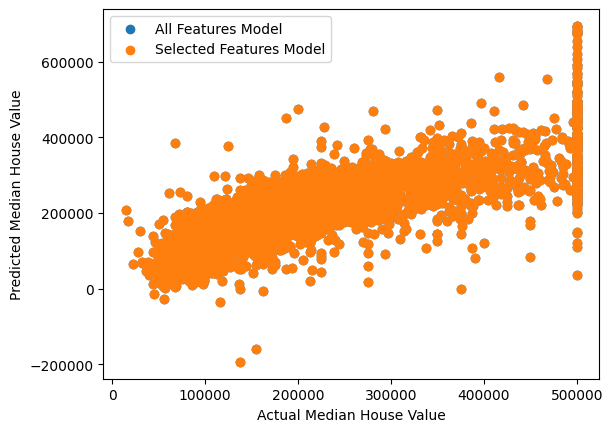

In [ ]:
# Visualize actual vs. predicted values for both models on the testing set
plt.scatter(y_test, y_pred, label='All Features Model')
plt.scatter(y_test, y_pred_selected, label='Selected Features Model')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend()
plt.show()